In [1]:
#! usr/bin/env/python3
#-*- coding: utf-8 -*-

In [2]:
# from __future__ import division
# from __future__ import print_function
# from sklearn import svm
# from pip.req.req_file import preprocess
# from mistune import preprocessing
# from numpy import newaxis
# from sklearn.preprocessing import scale
import pandas as pd
import seaborn as sns
import sklearn as sk
# import numpy as np
# import scipy as sp
# import statsmodels.api as sm
# import matplotlib as mpl
# import matplotlib.pylab as plt

sns.set()

# plt.rc('font',family='AppleGothic')

# import sys
# print(sys.stdin.encoding, sys.stdout.encoding)

In [3]:
# Dataframe 전체 출력 함수

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [4]:
raw_data = pd.DataFrame.from_csv("train.csv", index_col=False)
test_data = pd.DataFrame.from_csv("test.csv", index_col=False)

In [5]:
raw_data

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [6]:
Y = raw_data.OutcomeType

In [7]:
X = raw_data.drop(labels = ["OutcomeType", "OutcomeSubtype"], axis = 1)

In [8]:
# Check number of categoties in each columns
print( len( X.AnimalType.unique() ) )
print( len( X.SexuponOutcome.unique() ) )
print( len( X.AgeuponOutcome.unique() ) )
print( len( X.Breed.unique() ) )
print( len( X.Color.unique() ) )

2
6
45
1380
366


In [9]:
#fillna function can “fill in” NA values with non-null data
prep_X = X.fillna('NA')
prep_X

,AnimalID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NA,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NA,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NA,2015-04-30 17:02:00,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NA,2014-05-03 07:48:00,Dog,Spayed Female,1 year,Cairn Terrier,White


In [10]:
# Check data of categoties in each columns
print( prep_X.AnimalType.unique() ) 
print( prep_X.SexuponOutcome.unique() )
print( prep_X.AgeuponOutcome.unique() ) 
print( prep_X.Breed.unique() ) 
print( prep_X.Color.unique() ) 

['Dog' 'Cat']
['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 'NA']
['1 year' '2 years' '3 weeks' '1 month' '5 months' '4 years' '3 months'
 '2 weeks' '2 months' '10 months' '6 months' '5 years' '7 years' '3 years'
 '4 months' '12 years' '9 years' '6 years' '1 weeks' '11 years' '4 weeks'
 '7 months' '8 years' '11 months' '4 days' '9 months' '8 months' '15 years'
 '10 years' '1 week' '0 years' '14 years' '3 days' '6 days' '5 days'
 '5 weeks' '2 days' '16 years' '1 day' '13 years' 'NA' '17 years'
 '18 years' '19 years' '20 years']
['Shetland Sheepdog Mix' 'Domestic Shorthair Mix' 'Pit Bull Mix' ...,
 'Vizsla/Boxer' 'German Shepherd/Australian Kelpie' 'Boxer/German Shepherd']
['Brown/White' 'Cream Tabby' 'Blue/White' 'Blue Cream' 'Tan' 'Black/Tan'
 'Blue Tabby' 'Brown Tabby' 'Red/White' 'White' 'Black' 'Silver' 'Brown'
 'Black/Red' 'White/Cream' 'Orange Tabby/White' 'Black/White'
 'Brown Brindle/White' 'Black/Brown' 'Orange Tabby' 'Chocolate/White'
 'White/Tan' '

In [11]:
prep_X = pd.get_dummies( X.AnimalType )
prep_X.head()

,Cat,Dog
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [12]:
prep_X = pd.concat( [prep_X, pd.get_dummies( X.SexuponOutcome )], axis=1 )
prep_X.head()

,Cat,Dog,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
chk_Y = pd.DataFrame(Y)
chk_Y.loc[:,"OutcomeType_label"] = LabelEncoder().fit_transform(Y)
chk_Y.head()

,OutcomeType,OutcomeType_label
0,Return_to_owner,3
1,Euthanasia,2
2,Adoption,0
3,Transfer,4
4,Transfer,4


In [15]:
prep_Y = LabelEncoder().fit_transform(Y)
prep_Y

array([3, 2, 0, ..., 0, 4, 4])

In [16]:
prep_X_Y = prep_X
prep_X_Y['OutcomeType_label'] = prep_Y
print(prep_X_Y)
prep_X_Y.to_csv("simple_preprocess.csv")

       Cat  Dog  Intact Female  Intact Male  Neutered Male  Spayed Female  \
0      0.0  1.0            0.0          0.0            1.0            0.0   
1      1.0  0.0            0.0          0.0            0.0            1.0   
2      0.0  1.0            0.0          0.0            1.0            0.0   
3      1.0  0.0            0.0          1.0            0.0            0.0   
4      0.0  1.0            0.0          0.0            1.0            0.0   
5      0.0  1.0            1.0          0.0            0.0            0.0   
6      1.0  0.0            0.0          1.0            0.0            0.0   
7      1.0  0.0            0.0          0.0            0.0            0.0   
8      0.0  1.0            0.0          0.0            0.0            1.0   
9      0.0  1.0            0.0          0.0            0.0            1.0   
10     1.0  0.0            0.0          0.0            0.0            0.0   
11     0.0  1.0            0.0          0.0            0.0            1.0   

In [17]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(C=1000).fit(prep_X, prep_Y)

y_pred = model_1.predict(prep_X)
classif_rate = np.mean(y_pred.ravel() == prep_Y.ravel()) * 100

print("classif_rate: %f " % classif_rate)

classif_rate: 95.985634 


/Users/DS/.pyenv/versions/3.5.0/envs/my-virtual-env-3.5.0/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


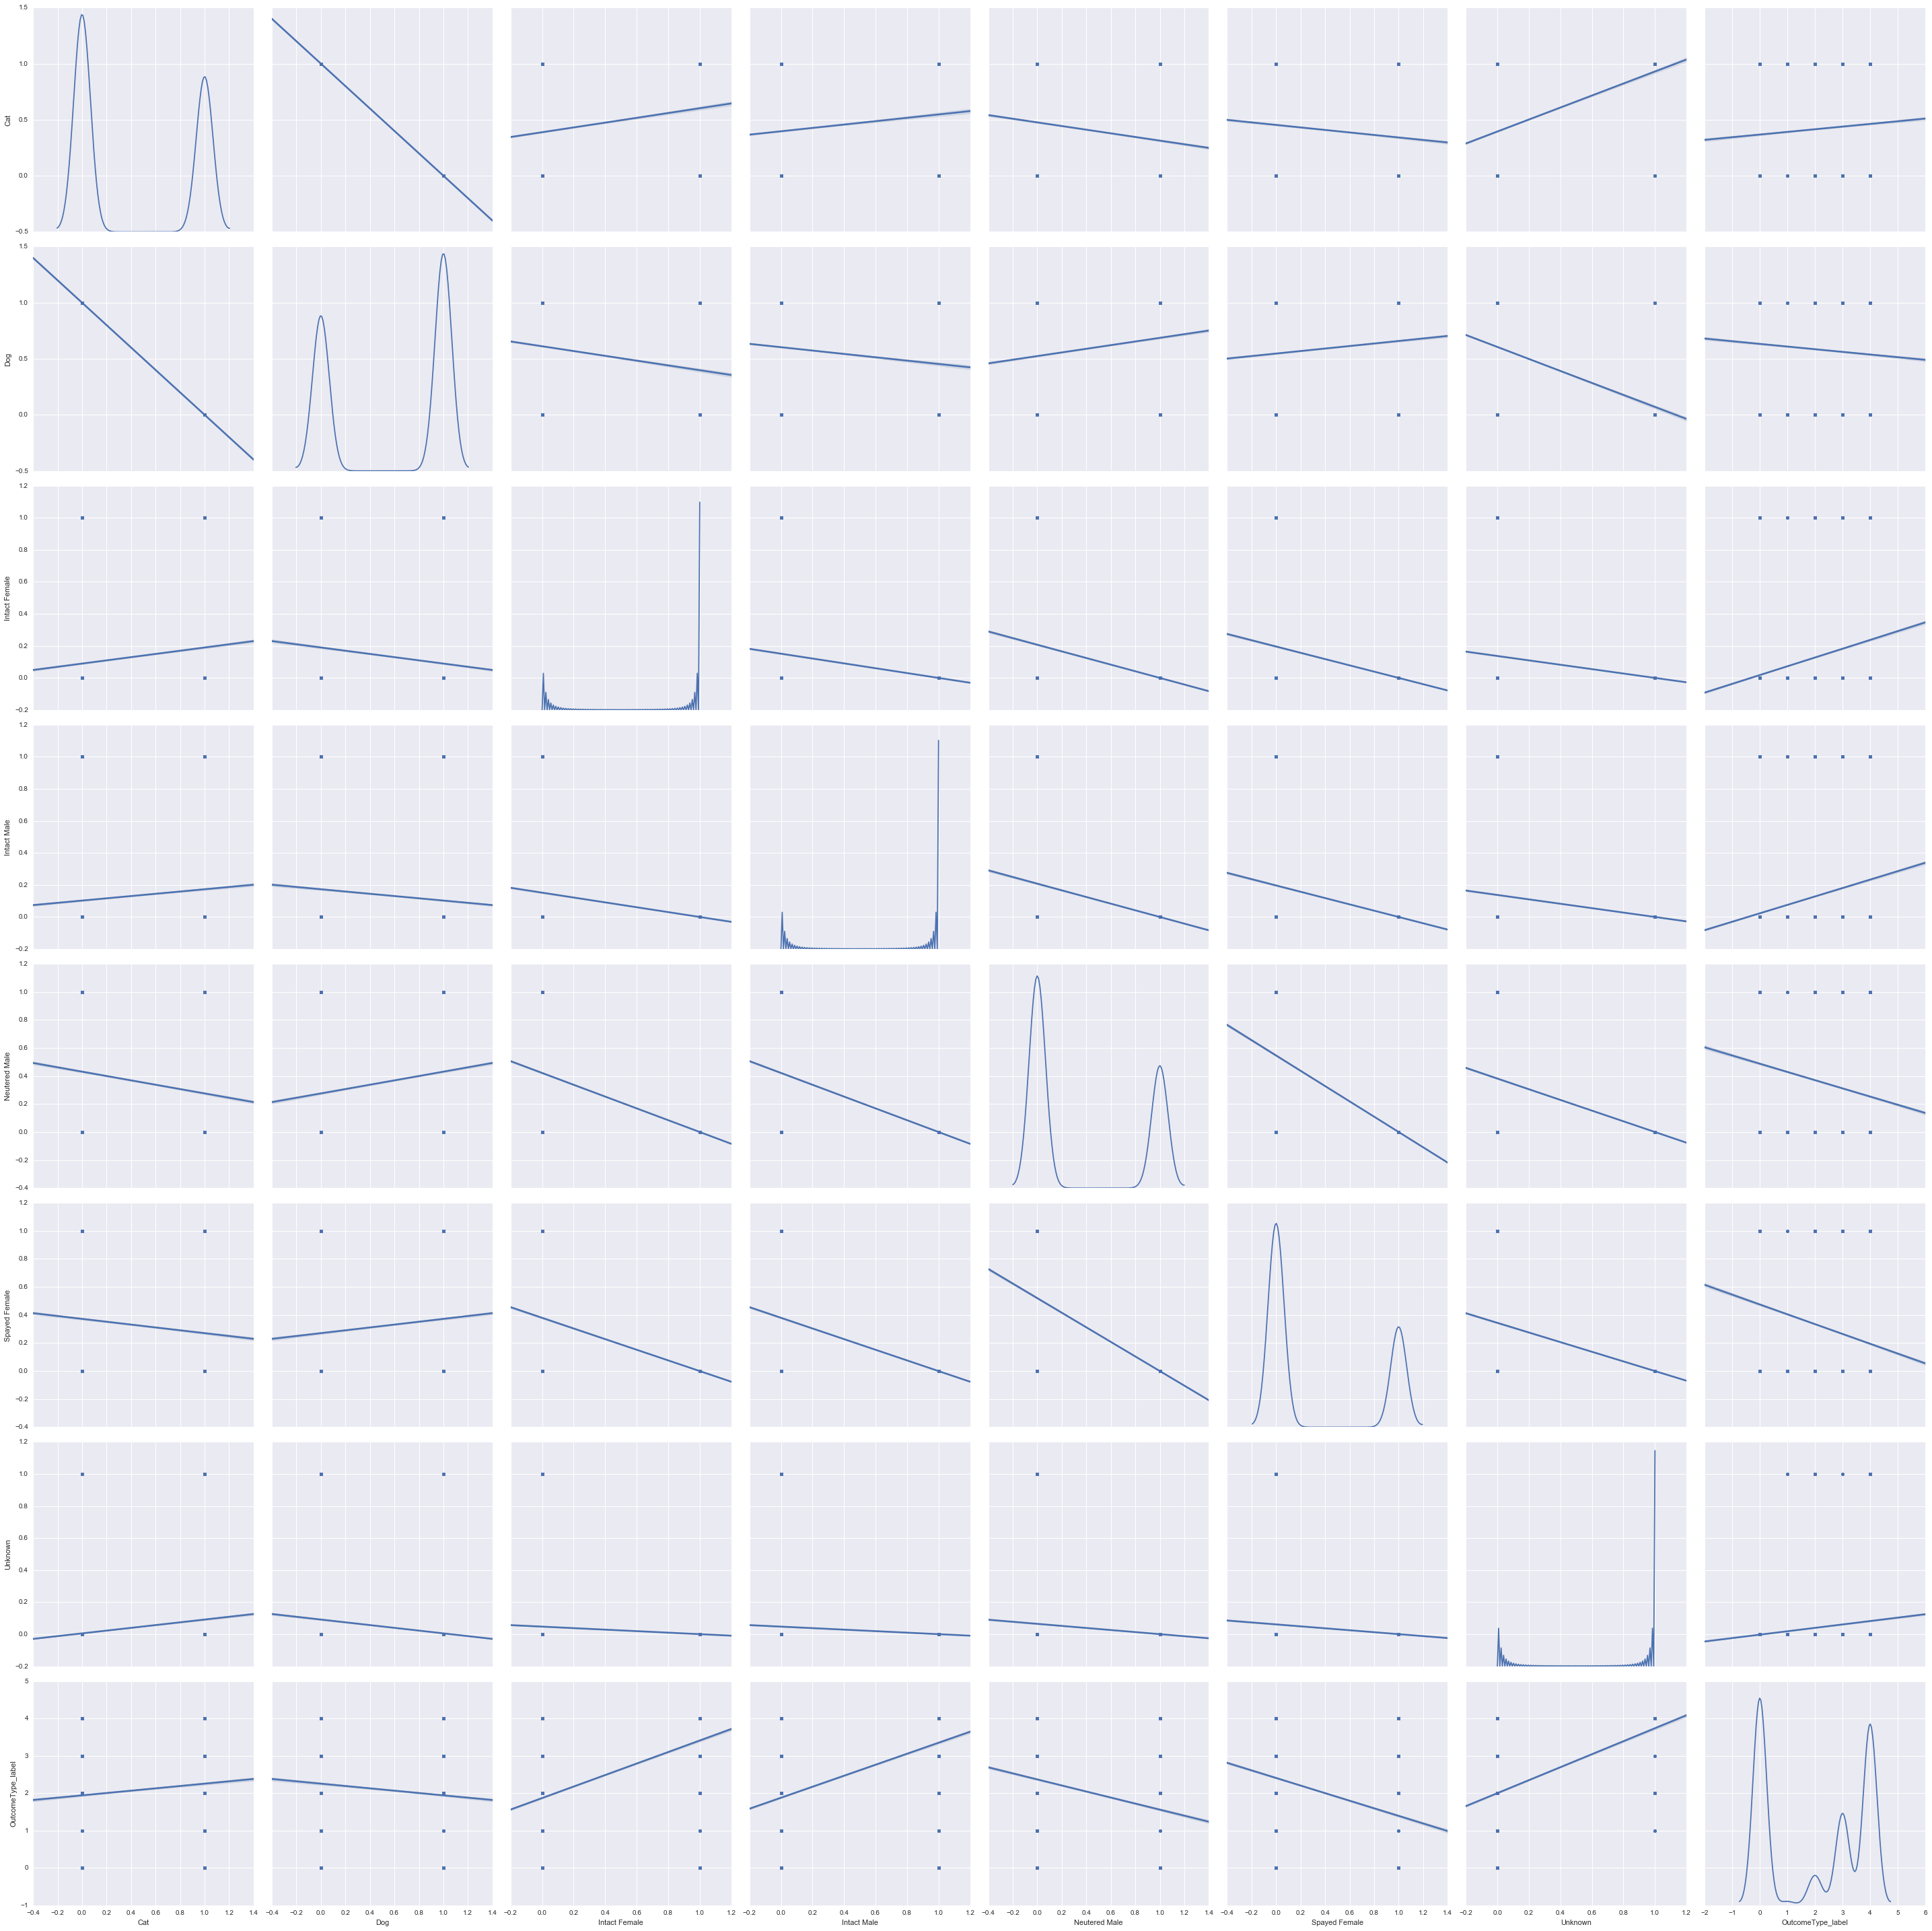

In [18]:
# First EDA(Exploratory data analysis) with vote_1(target)

sns.pairplot(prep_X_Y, diag_kind="kde", kind="reg", size=5)
plt.show()